# Deposit Volume Forecasting for Asset Liability Management Using SARIMAX: A Scenario-Based Approach

## Scope & Research Questions:

1. **Interpretability:** How do macroeconomic indicators, including GDP, Treasury Rate, Unemployment Rate, Housing Price, and Consumer Price Rate (CPI), influence or correlate with changes in total domestic deposits in the United States?
2. **Forecast:** How would domestic deposits' behavior change under different future scenarios? To simulate reasonable future scenarios, we refer to the four stress test scenarios introduced by the Federal Reserve System.
3. **Exposure:** What is the Bank’s overall exposure to profit/loss under different future scenarios?

In [3]:
# Identify the current working directory
import os
print("Current working directory:", os.getcwd())

Current working directory: /Users/ching-lung/deposit-prediction/ARIMA


## Import Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

## Import Dataset

In [7]:
# Load the clean data into the jupyter notebook
df = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/data_clean.csv")
# df.columns
df.tail(1)

,Date,Real GDP growth,Nominal GDP growth,Real disposable income growth,Nominal disposable income growth,Unemployment rate,CPI inflation rate,3-month Treasury rate,5-year Treasury yield,10-year Treasury yield,...,Commercial Real Estate Price Index (Level),Real GDP,Real disposable income,Loans to individuals,Credit cards,Other loans to individuals,Deposits,Interest-bearing deposits,Noninterest-bearing deposits,Time deposits
159,2023Q4,1.5,3.6,2.2,4.4,3.7,2.8,5.3,4.5,4.5,...,348.9,271649.23,236845.97,2135614,1116816,1018798,18813707,13363001,3982623,2869517


# Data Descriptions

The dataset provides a comprehensive view of the **Assets and Liabilities of FDIC-Insured Commercial Banks and Savings Institutions**, presented quarterly. It captures financial data spanning decades, enabling detailed analysis of banking trends and economic factors influencing the industry.

Key features include:

1. **Time Series Coverage**:  
   - Quarterly data spanning from 1984Q1 to the most recent quarter (2023Q4).  
   - Each column represents financial metrics or relevant details for a specific quarter.

2. **Reported Metrics**:  
   - Includes aggregated data on FDIC-insured institutions' assets, liabilities, and equity positions.  
   - Captures key indicators such as the number of reporting institutions, total deposits, loans, securities, and other balance sheet items.

3. **Institutional Scope**:  
   - Data pertains to commercial banks and savings institutions insured by the FDIC.  
   - Useful for analyzing both system-wide financial conditions and individual institution types.

4. **Data Structure**:  
   - The first few rows provide metadata and column headers.  
   - The dataset is organized into wide-format tables, with quarters as columns and metrics as rows.

5. **Applications**:  
   - Ideal for macroeconomic analysis, stress testing, and performance benchmarking.  
   - Provides insights into long-term deposit trends, loans, and other balance sheet components.  

6. **Potential Insights**:  
   - Identifying correlations between macroeconomic indicators and bank financials.  
   - Modeling stress-test scenarios and their impact on key metrics.  

The dataset is a rich resource for financial analysts, economists, and regulators interested in exploring historical and predictive trends within the U.S. banking sector. 

# Exploratory Data Analysis

To begin with we plot the trend of the **total deposit** for all FDIC institutions.

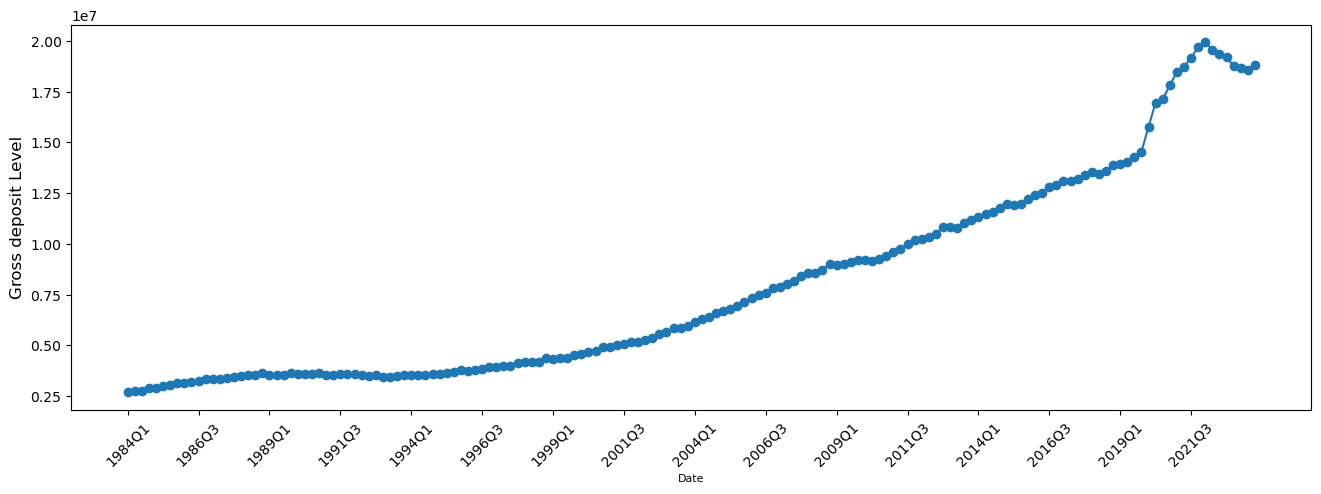

In [10]:
plt.figure(figsize=(16,5))
plt.plot(df.Date, df["Deposits"], '-o')
plt.xticks(df.Date[::10], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Date", fontsize=8)
plt.ylabel("Gross deposit Level", fontsize=12)
plt.show()

## Macroeconomic Predictors

Next, we also plot the trend of selected macroeconomic predictors. Here’s a brief description of the mentioned macroeconomic predictors:

1. **Real GDP (Gross Domestic Product)**: Measures the total value of goods and services produced in an economy, adjusted for inflation. It reflects the overall economic activity and health.

2. **Unemployment Rate**: The percentage of the labor force actively seeking work but unable to find employment. It indicates labor market conditions and economic stability.

3. **Mortgage Rate**: The average interest rate charged on loans for purchasing homes. It reflects borrowing costs in the housing market and is influenced by broader interest rate trends.

4. **Prime Rate**: The interest rate that commercial banks charge their most creditworthy customers, typically influencing borrowing costs across the economy.

5. **House Price Index (HPI)**: Tracks changes in residential real estate prices over time, indicating trends in the housing market and overall economic conditions related to property investment. 

6. **CPI (Consumer Price Index) Inflation Rate**: This measure measures the average change over time in consumers' prices for goods and services. It reflects the rate of inflation and purchasing power trends. 

7. **3-Month Treasury Rate**: The yield on short-term U.S. government debt with a maturity of three months. It is a benchmark for risk-free interest rates and reflects monetary policy and market conditions.

These predictors are essential for understanding economic dynamics and are widely used in forecasting and modeling financial and economic trends.

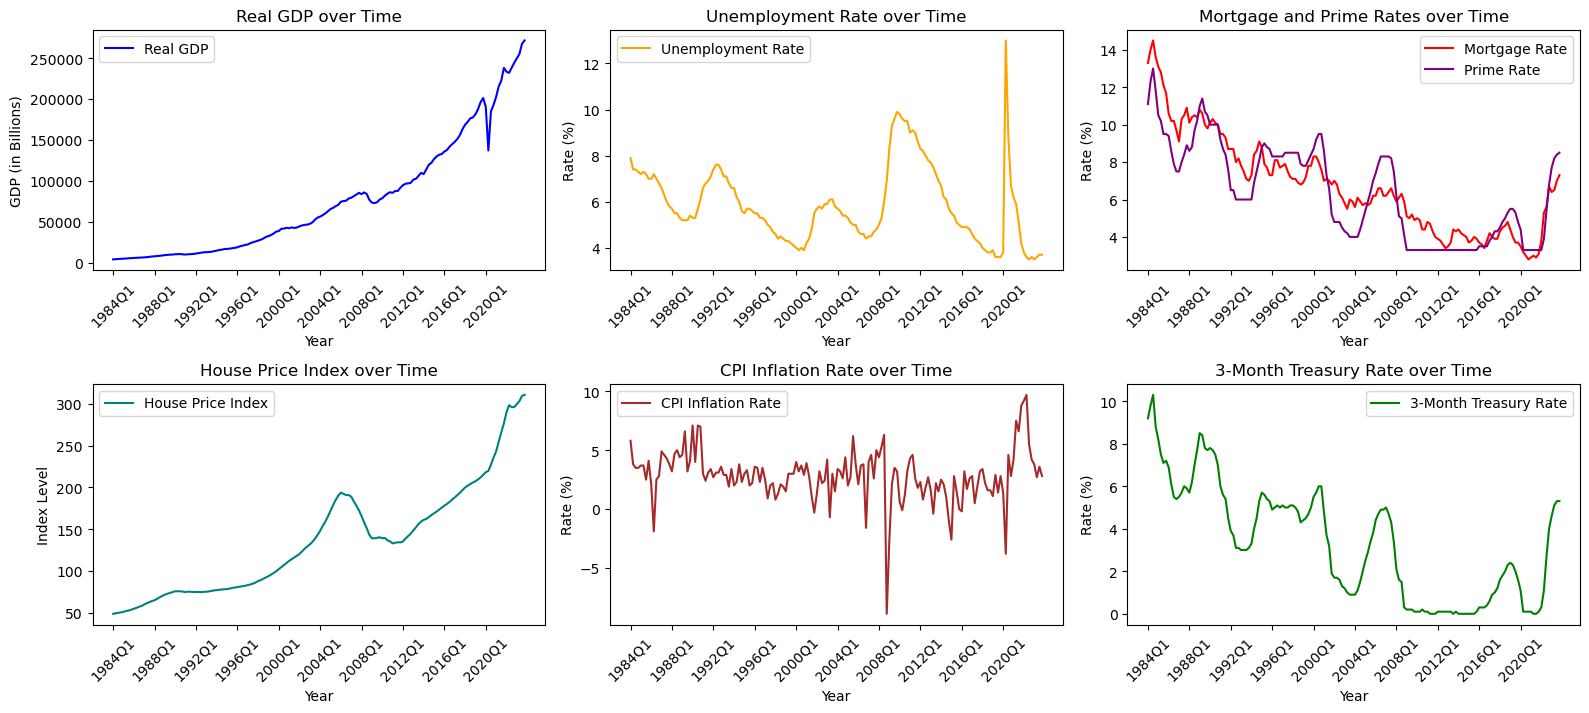

In [12]:
plt.figure(figsize=(16, 10))

# Subplot 1: Real GDP
plt.subplot(3, 3, 1)
plt.plot(df.Date, df['Real GDP'], label='Real GDP', color='blue')
plt.title('Real GDP over Time')
plt.xlabel('Year')
plt.ylabel('GDP (in Billions)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 2: Unemployment Rate
plt.subplot(3, 3, 2)
plt.plot(df.Date, df['Unemployment rate'], label='Unemployment Rate', color='orange')
plt.title('Unemployment Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 3: Mortgage & Prime Rate
plt.subplot(3, 3, 3)
plt.plot(df.Date, df['Mortgage rate'], label='Mortgage Rate', color='red')
plt.plot(df.Date, df['Prime rate'], label='Prime Rate', color='purple')
plt.title('Mortgage and Prime Rates over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 4: House Price Index
plt.subplot(3, 3, 4)
plt.plot(df.Date, df['House Price Index (Level)'], label='House Price Index', color='teal')
plt.title('House Price Index over Time')
plt.xlabel('Year')
plt.ylabel('Index Level')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 5: CPI Inflation Rate
plt.subplot(3, 3, 5)
plt.plot(df.Date, df['CPI inflation rate'], label='CPI Inflation Rate', color='brown')
plt.title('CPI Inflation Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

# Subplot 6: 3-Month Treasury Rate
plt.subplot(3, 3, 6)
plt.plot(df.Date, df['3-month Treasury rate'], label='3-Month Treasury Rate', color='green')
plt.title('3-Month Treasury Rate over Time')
plt.xlabel('Year')
plt.ylabel('Rate (%)')
plt.xticks(ticks=df.index[::int(len(df)/10)], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Correlation Heatmap

Next, we plot the corrleations plot among features and the targeted response: **deposit**. As we can see from the graph below, **deposits** are highly correlated with GDP related index and mildly correlated with treasuray related predictors.

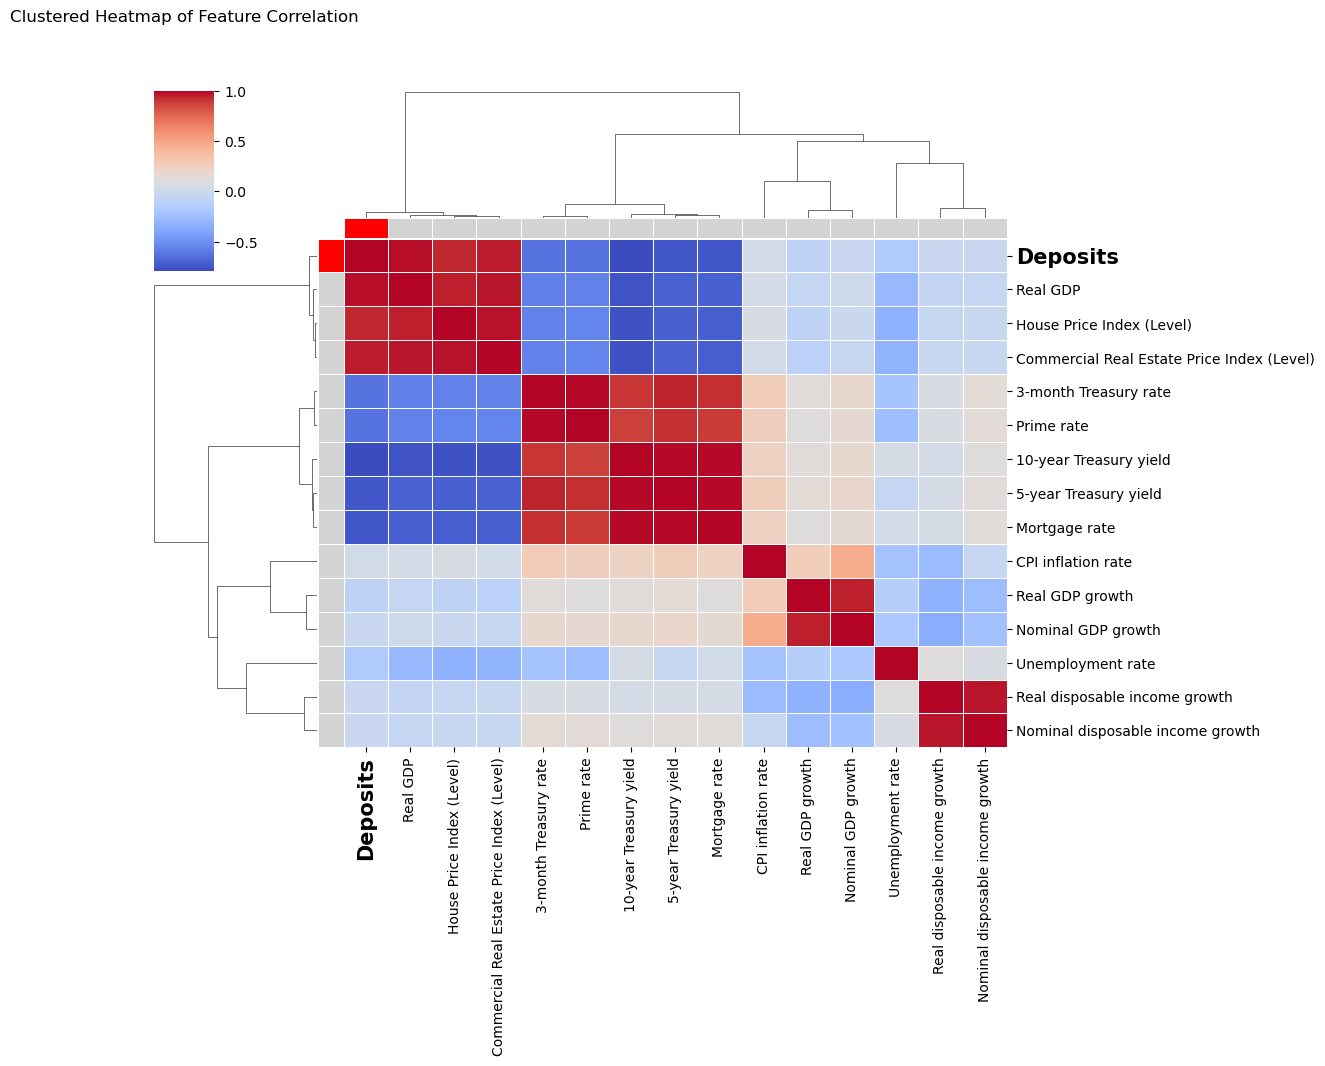

In [14]:
# Assuming 'df' is already defined
selected_columns = list(range(1, 15)) + [19]
correlation_matrix = df.iloc[:, selected_columns].corr()

# Create a mapping for label colors, highlight column 21
col_colors = ['lightgray'] * correlation_matrix.shape[0]
col_colors[-1] = 'red'  # Highlight the last column (column 21)

# Create the clustermap
clustermap = sns.clustermap(
    correlation_matrix,
    cmap='coolwarm',
    linewidths=0.5,
    figsize=(12, 10),
    col_colors=col_colors,  # Column colors
    row_colors=col_colors,  # Row colors
)

# Make the deposit column label bold
x_labels = clustermap.ax_heatmap.get_xticklabels()
y_labels = clustermap.ax_heatmap.get_yticklabels()

# Highlight the deposit label on both axes
x_labels[0].set_fontweight('bold')
y_labels[0].set_fontweight('bold')
x_labels[0].set_fontsize(15)  # Adjust font size
y_labels[0].set_fontsize(15)  # Adjust font size

# Apply changes back to the plot
clustermap.ax_heatmap.set_xticklabels(x_labels, rotation=90)
clustermap.ax_heatmap.set_yticklabels(y_labels)

# Add a title
plt.title('Clustered Heatmap of Feature Correlation', pad=50)
plt.show()

## Stationarity 

**Stationarity** in time series means the statistical properties (mean, variance, and autocovariance) remain constant over time. It's crucial for many models, like ARIMA, which assume that past patterns can predict future behavior consistently.

#### Characteristics:
1. Constant Mean: No upward or downward trends.
2. Constant Variance: Fluctuations remain steady over time.
3. Constant Autocovariance: Relationships between time points are stable.

#### Dealing with Non-Stationarity: 
Real-world data often show trends or seasonality, making them non-stationary. Common techniques to achieve stationarity include:
- Differencing: Removing trends by subtracting consecutive values.
- Detrending: Eliminating linear or non-linear trends.
- Log Transformation: Stabilizing variance.

## **Augmented Dickey-Fuller (ADF) Test**:
The ADF test checks for stationarity by testing the null hypothesis that a unit root (non-stationarity) exists. A **p-value < 0.05** typically indicates stationarity, meaning the time series does not have a unit root. If the p-value of the test is less than a chosen significance level (e.g., 0.05), then the null hypothesis of a unit root is rejected and the data is considered stationary.


In [16]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Function to apply ADF test and return results
def adf_test(series, column_name):
    result = adfuller(series.dropna())  # Dropping NA values to avoid errors
    output = {
        'Test Statistic': result[0],
        'p-value': result[1],
        'Lags Used': result[2],
        'Number of Observations': result[3],
        'Critical Values': result[4],
    }
    return pd.DataFrame(output, index=[column_name])

# Running ADF test on the deposits
adf_deposits = adf_test(df.Deposits, "Deposit")
adf_deposits

,Test Statistic,p-value,Lags Used,Number of Observations,Critical Values
Deposit,3.176465,1.0,14,145,NaN


## ACF and PACF plots

The ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots are used to identify the order of the AR (Autoregressive) and MA (Moving Average) terms in an ARIMA model. The ACF plot shows the correlation between the time series and its lagged values. The PACF plot shows the correlation between the time series and its lagged values, after removing the effects of the intermediate lags.

#### Intepretations:

ACF plot: If the ACF plot shows a sharp drop-off after a certain lag, it suggests that the time series is stationary and an AR model may be appropriate. If the ACF plot shows a gradual decay, it suggests that the time series may be non-stationary and a differencing operation may be required.

PACF plot: If the PACF plot shows a sharp drop-off after a certain lag, it suggests that an AR model may be appropriate. If the PACF plot shows a gradual decay, it suggests that an MA model may be appropriate.

Combined ACF and PACF plots: If the ACF plot shows a gradual decay and the PACF plot shows a sharp drop-off after a certain lag, it suggests that an ARMA model may be appropriate.

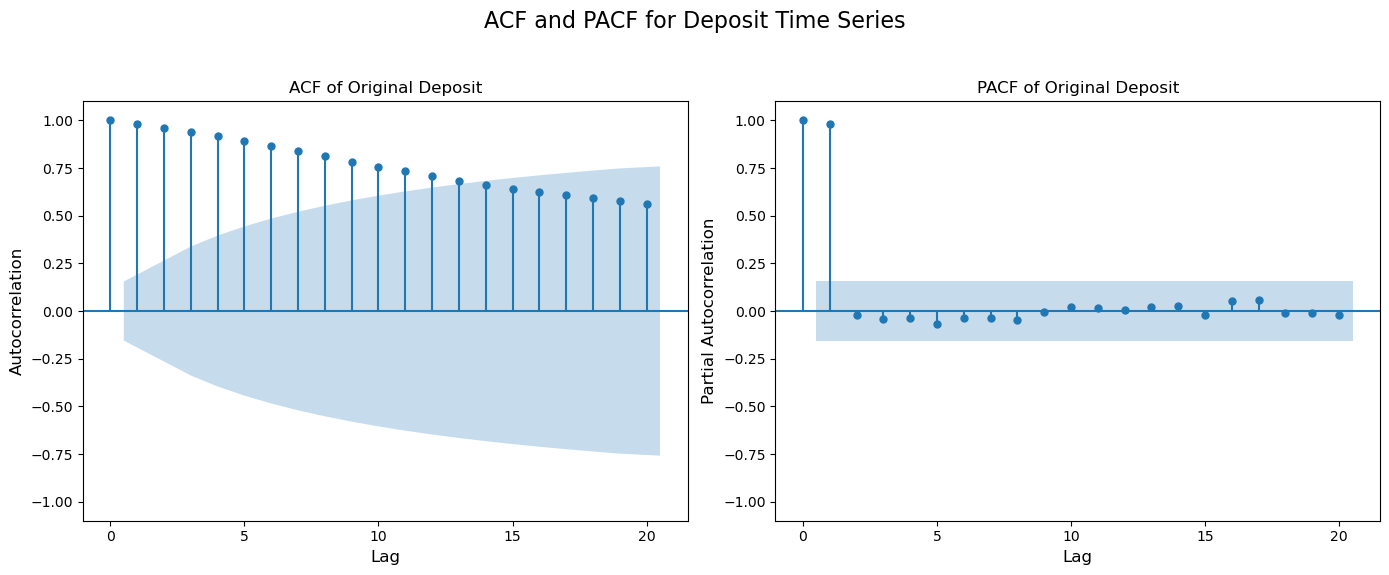

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

# Compute ACF and PACF for the differenced series
lags = 20  # Number of lags to plot
acf_differenced = acf(df.Deposits, nlags=lags, fft=True)  # Use the differenced series
pacf_differenced = pacf(df.Deposits, nlags=lags)

# Plot the ACF and PACF for the differenced series
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("ACF and PACF for Deposit Time Series", fontsize=16)

# ACF plot using statsmodels
sm.graphics.tsa.plot_acf(df.Deposits, lags=lags, ax=axes[0], title="ACF of Original Deposit")
axes[0].set_ylabel("Autocorrelation", fontsize=12)
axes[0].set_xlabel("Lag", fontsize=12)
axes[0].set_ylim(-1.1, 1.1)

# PACF plot using statsmodels
sm.graphics.tsa.plot_pacf(df.Deposits, lags=lags, ax=axes[1], title="PACF of Original Deposit")
axes[1].set_ylabel("Partial Autocorrelation", fontsize=12)
axes[1].set_xlabel("Lag", fontsize=12)
axes[1].set_ylim(-1.1, 1.1)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Differencing

If the data is not stationary, one would usually conisder applying differencing to make it more statonary. **Differencing** is a transformation technique that removes trends and seasonality from a time series, making it stationary by calculating differences between consecutive data points.

#### Formula
For a series \(y_t\):
- **First difference**: \(y'_t = y_t - y_{t-1}\)
- **Second difference**: \(y''_t = y'_t - y'_{t-1}\)

#### Importance in ARIMA
In ARIMA (**AutoRegressive Integrated Moving Average**), differencing addresses the "Integrated" component, ensuring the series is stationary. This is critical because:
1. **Stationarity**: ARIMA assumes stationary data for reliable modeling.
2. **Integration**: The parameter \(d\) represents the number of differencing steps needed:
   - \(d = 0\): Data is stationary.
   - \(d = 1\): First differencing.
   - \(d = 2\): Second differencing.

Differencing stabilizes the mean and removes trends, enabling AR (AutoRegressive) and MA (Moving Average) components to model underlying patterns effectively.

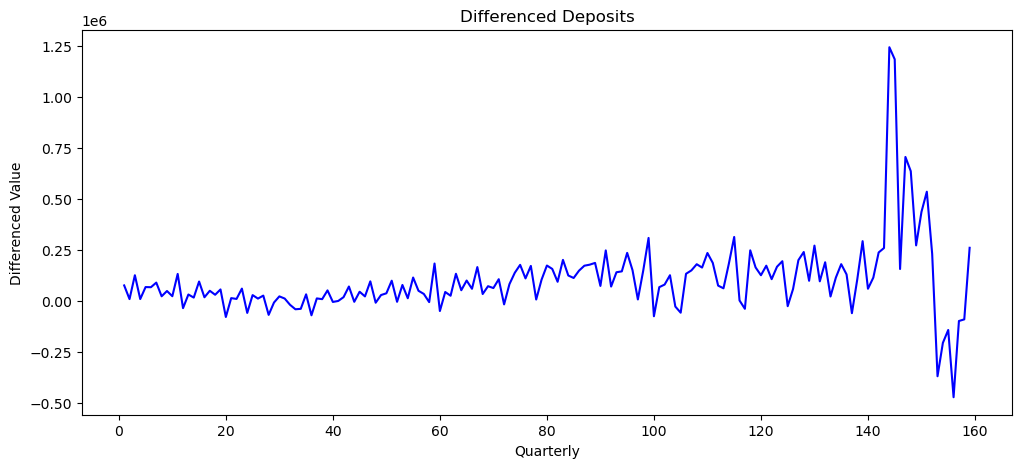

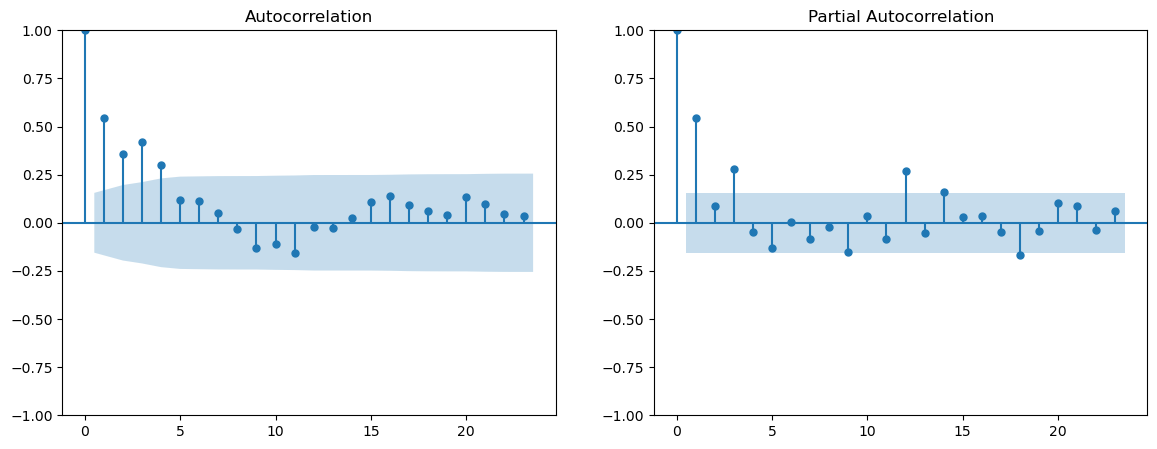

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Differencing the 'Non-maturity Interest-bearing deposits' series to make it stationary
dg = df.Deposits.copy().diff(1).dropna()

# Plot the differenced series to check for stationarity visually
plt.figure(figsize=(12, 5))
plt.plot(dg, color='blue')
plt.title('Differenced Deposits')
plt.xlabel('Quarterly')
plt.ylabel('Differenced Value')
plt.show()

# Step 2: Plot ACF and PACF to determine the order of ARIMA
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

plot_acf(dg, ax=ax[0])
plot_pacf(dg, ax=ax[1])

plt.show()

In [21]:
# Running ADF test on the deposits
adf_deposits_diff = adf_test(dg, "Deposit Difference")
adf_deposits_diff

,Test Statistic,p-value,Lags Used,Number of Observations,Critical Values
Deposit Difference,-0.654949,0.858076,14,144,NaN


### Remark

As we can see, even after 1st differencing, the data still not pass the **ADF test**. Several potenetial factor could be considered but might take a while to figure out the key factors. Fortunately, we will introduce and utilize a package, `auto_arima`, which helps automatically sleect the best differencing along with parameters related to other factors.

# Time Series Models: ARIMA, SARIMA, and SARIMAX

Here are the descriptions of our main model. We will introduce and describe them sequentially by ARIMA, SARIMA, and SARIMAX. Each of the latter augmented the functionality of previouse models to adept to more complicated real world time series data. 

## ARIMA Model
**ARIMA (Auto Regressive Integrated Moving Average)** is a time series forecasting method that models:
- **AR (Auto Regressive)**: Uses past values to predict the future.
- **I (Integrated)**: Differencing to make the series stationary by removing trends.
- **MA (Moving Average)**: Models the dependency on past forecast errors.

### General ARIMA Equation:
$$
y_t^{(d)} = \sum_{i=1}^{p} \phi_i \hspace{1mm} y_{t-i}^{(d)} + \sum_{j=1}^{q} \theta_j \hspace{1mm} \epsilon_{t-j}^{(d)} + \epsilon_t,
$$

where:
- $y_t^{(d)}$: The d-th differenced value of the series at time $t$.
- $\phi_i$: Auto-regressive coefficients.
- $\theta_j$: Moving average coefficients.
- $\epsilon_t$: Random error (noise) at time $t$.

### Role of Differencing
- **First Differencing**: Removes trends by calculating the change between consecutive values: $y_t^{(1)} = y_t - y_{t-1}$.
- **Higher-Order Differencing**: If trends persist after the first differencing, apply second or higher-order differencing: $y_t^{(d)} = y_t^{(d-1)} - y_{t-1}^{(d-1)}$ for $d>1$.

**Key Idea:** Differencing transforms a non-stationary series into a stationary one, enabling ARIMA to model patterns effectively.

### Rewrite ARIMA Using Backshift Operator

$$
(1 - B)^d y_t = \sum_{i=1}^{p} \phi_i B^i (1 - B)^d y_t + \sum_{j=1}^{q} \theta_j B^j \epsilon_t + \epsilon_t,
$$

where:

- $B$: Backward shift operator ($B y_t = y_{t-1}$).
- $(1 - B)^d$: Differencing operator applied $d$ times.
- $\phi(B) = \sum_{i=1}^p \phi_i B^i$: Non-seasonal autoregressive polynomial.
- $\theta(B) = \sum_{j=1}^q \theta_j B^j$: Non-seasonal moving average polynomial.



## SARIMA Model
**SARIMA (Seasonal ARIMA)** extends ARIMA by including seasonal components to capture repeating patterns over fixed intervals. The model is represented as:

$$
SARIMA(p, d, q)(P, D, Q, S)
$$

Where:
- $p, d, q$: Non-seasonal ARIMA parameters.
- $P, D, Q$: Seasonal ARIMA parameters.
- $S$: Seasonal period.

### General SARIMA Equation:
$$
\Phi_P(B^S) \phi(B) (1 - B)^d (1 - B^S)^D y_t = \Theta_Q(B^S) \theta(B) \epsilon_t
$$

Where:
- $B$: Backward shift operator ($B y_t = y_{t-1}$).
- $\Phi_P(B^S)$: Seasonal AR polynomial (captures seasonal autoregressive patterns).
- $\phi(B)$: Non-seasonal AR polynomial.
- $(1 - B)^d$: Non-seasonal differencing (removes trends).
- $(1 - B^S)^D$: Seasonal differencing (removes repeating seasonal patterns).
- $\Theta_Q(B^S)$: Seasonal MA polynomial (smooths seasonal errors).
- $\theta(B)$: Non-seasonal MA polynomial.
- $\epsilon_t$: Random error (noise).

**Key Idea:** SARIMA models both trend and seasonality in a time series, making it suitable for data with periodic patterns.



## SARIMAX Model
**SARIMAX (Seasonal ARIMA with eXogenous variables)** extends SARIMA by incorporating external predictors (exogenous variables) that influence the target series.

### General SARIMAX Equation:
$$
\Phi_P(B^S) \phi(B) (1 - B)^d (1 - B^S)^D y_t = \Theta_Q(B^S) \theta(B) \epsilon_t + \sum_{l=1}^{n} \beta_l X_{tl}
$$

Where:
- $X_{t1}, X_{t2}, \dots, X_{tn}$: External variables affecting $y_t$.
- $\beta_1, \beta_2, \dots, \beta_n$: Coefficients measuring the influence of each external variable.

**Key Idea:** SARIMAX captures the effects of both internal patterns (trend, seasonality) and external influences on the target variable.



## Summary of Models
| **Model**  | **Components**                           | **Use Case**                                                                 |
|------------|------------------------------------------|------------------------------------------------------------------------------|
| **ARIMA**  | Trend modeling using AR, MA, and differencing. | Best for stationary data without seasonality.                                |
| **SARIMA** | Adds seasonal components to ARIMA.       | Suitable for time series with trend and repeating seasonal patterns.         |
| **SARIMAX**| Extends SARIMA by including external variables. | Useful when external factors significantly influence the time series.        |





## Model Implementation with `auto_arima`

`auto_arima` is a function from the **pmdarima** library that automates the selection of optimal parameters for ARIMA and SARIMA models. It uses techniques like grid search and information criteria (e.g., AIC, BIC) to find the best model. `auto_arima` is ideal for quickly building robust time series models without extensive manual tuning, especially for complex or seasonal datasets.

### Advantages

- **Automation**: Automatically selects parameters, saving time and effort.
- **Seasonality Detection**: Identifies and handles seasonal components.
- **Model Selection**: Chooses the best model based on AIC or BIC.
- **External Variables**: Supports exogenous variables for SARIMAX.
- **Ease of Integration**: Works with libraries like `statsmodels` and `sklearn`.
- **Customizable**: Allows parameter bounds and controls for stationarity.
- **Error Handling**: Automatically checks and adjusts for stationarity and differencing.


# Model Evaluation: MASE

**MASE (Mean Absolute Scaled Error)** is a scale-independent metric used to evaluate forecasting accuracy. It compares the model's performance against a naive baseline forecast.

## The Formula
$$
MASE = \frac{\frac{1}{n} \sum_{t=1}^n |y_t - \hat{y}_t|}{\frac{1}{n-1} \sum_{t=2}^n |y_t - y_{t-1}|}
$$

Where:
- $y_t$: Actual value at time $t$.
- $\hat{y}_t$: Forecasted value at time $t$.
- $n$: Number of observations.

**Key Idea**: The numerator measures the model's forecast error, while the denominator benchmarks it against a naive forecast.

## Reasons to Use MASE
1. **Scale Independence**: Enables comparison across datasets with different units or scales.
2. **Relative Benchmarking**: Indicates performance relative to a naive forecast (values < 1 are better than naive).
3. **Robust to Outliers**: Uses absolute errors, making it less sensitive to extreme values.
4. **Handles Various Time Series**: Suitable for seasonal and non-stationary data.
5. **Versatility**: Provides meaningful results for diverse datasets and forecasting horizons.


In [137]:
# from pmdarima import auto_arima
# from sklearn.model_selection import TimeSeriesSplit
# import numpy as np

# #best fold MASE
# # Custom MASE function
# def mase(y_train, y_test, y_preds):
#     n = len(y_train)
#     m = len(y_test)
#     denom = 0
#     for i in range(n - m):
#         denom += np.abs(y_train[i + 1:i + m + 1] - y_train[i] * np.ones(m)).mean()
#     denom = denom / (n - m)
#     num = np.abs(y_test - y_preds).mean()
#     return num / denom

# # Number of splits for cross-validation
# k_folds = 5

# # Initialize TimeSeriesSplit for k-fold cross-validation
# tscv = TimeSeriesSplit(n_splits=k_folds)

# # Placeholder for best results
# best_m = None
# best_scores = float('inf')
# results = {}

# # Iterate over seasonal periods m = 1 to 39
# for m in range(1, 50):
#     print(f"Evaluating seasonal period m={m}")
#     fold_scores = []
    
#     # Perform k-fold cross-validation 
#     for fold, (train_idx, test_idx) in enumerate(tscv.split(df["Deposits"].values)):
#         print(f"  Fold {fold + 1}")
#         try:
#             # Split the data into train and test
#             train, test = df["Deposits"].values[train_idx], df["Deposits"].values[test_idx]
            
#             # Fit auto_arima for the current fold and m
#             model = auto_arima(
#                 train,
#                 seasonal=True,
#                 D=1,
#                 d=1,
#                 m=m,
#                 max_p=10,
#                 max_q=10,
#                 trace=False,
#                 error_action='ignore',
#                 suppress_warnings=True,
#                 stepwise=True
#             )
            
#             # Predict on the test set
#             preds = model.predict(len(test))
            
#             # Calculate MASE for the fold
#             score = mase(train, test, preds)
#             print(f"    MASE: {score:.4f}")
#             print(model)
#             fold_scores.append(score)
#         except Exception as e:
#             print(f"    Failed for m={m}, fold={fold + 1}: {e}")
    
#     # Average MASE score across folds
#     print(model)
#     results[m] = [score,model,fold]
   
# # Print the best results
# print(f"Best seasonal period m: {best_m}")
# print(f"Best MASE: {best_scores:.4f}")
# sorted_results = sorted(results.items(), key=lambda x: x[1][0])
# print(sorted_results[1])


# Stress Test Scenarios: Characteristics and Significance of the Four Future Scenarios

The Federal Reserve's 2024 stress test scenarios evaluate the banking system's resilience under diverse hypothetical economic conditions. These scenarios provide insights into potential vulnerabilities and guide decision-making to enhance financial stability. Below are detailed descriptions of the scenarios, their importance, and what they represent:

### Baseline Scenario (X_base)
- **Description**: The baseline scenario reflects moderate economic growth, aligning with average projections from forecasters like the Blue Chip Economic Indicators. It assumes a stable macroeconomic environment with gradual improvements in key indicators.
- **Why It Matters**: This scenario serves as the control, representing normal economic conditions against which more adverse scenarios are compared. It helps establish expectations for bank performance during routine operations.
- **Key Characteristics**:
  - **Economic Growth**: Moderate growth in U.S. real GDP, increasing from 1.5% to 1.9% by the end of the scenario.
  - **Unemployment**: Slight rise from 3.7% to 4.1%.
  - **Inflation**: Gradual decline in CPI inflation to 2.2%.
  - **Interest Rates**: 3-month Treasury rates declined from 5.3% to 3.1%, and 10-year Treasury yields fell from 4.5% to 3.6%.
  - **Asset Prices**: Gradual increase in house and commercial real estate prices by 1.5% annually.

### Severely Adverse Scenario (X_adv)
- **Description**: This scenario simulates a severe global recession with heightened financial market stress, including steep declines in asset prices and prolonged economic contraction. It represents extreme but plausible conditions.
- **Why It Matters**: Designed to test the resilience of banks to systemic shocks, this scenario highlights the potential impact of severe economic downturns on bank capital and liquidity, ensuring banks are prepared for worst-case situations.
- **Key Characteristics**:
  - **Global Recession**: Severe contraction in GDP, falling 8.5% before recovery.
  - **Unemployment**: Sharp rise to 10%.
  - **Deflationary Pressures**: CPI inflation drops to 1.3%.
  - **Interest Rates**: Significant decline, with 3-month Treasury rates falling to 0.1% and 10-year Treasury yields to 0.8%.
  - **Asset Prices**: Major declines (e.g., house prices fall 36%, equity prices drop 55%).

### Funding Stress under Moderate Stagflation (X_fsA)
- **Description**: This scenario combines moderate stagflation (high inflation and low growth) with funding stress, reflecting a transition of deposit types due to rising interest rates and inflationary pressures.
- **Why It Matters**: It assesses how banks would fare under increasing funding costs, highlighting the sensitivity of net interest income and capital ratios to a moderate but sustained economic stagnation.
- **Key Characteristics**:
  - **Inflation and Rates**: Inflation peaks at 5.3%, while the 10-year Treasury rate rises before gradually declining.
  - **Unemployment**: Peaks at 6.7%.
  - **Deposit Shift**: Non-interest-bearing deposits shift to time deposits, increasing funding costs but with a moderate impact on capital ratios.

### Funding Stress under Severe Stagflation (X_fsB)
- **Description**: This scenario presents severe stagflation, marked by persistent inflation, significant economic stagnation, and pronounced funding stress. It examines extreme cases of deposit repricing and its effects on bank capital.
- **Why It Matters**: It highlights vulnerabilities in bank balance sheets under harsher conditions, where inflationary pressures are compounded by a sharp rise in unemployment and reduced profitability.
- **Key Characteristics**:
  - **Inflation and Rates**: Inflation peaks at 6%, with a higher and more prolonged rise in the 10-year Treasury rate.
  - **Unemployment**: Rises sharply to 10%.
  - **Capital Impact**: Greater reduction in aggregate CET1 ratio (down by 2.7 percentage points).

---

These scenarios collectively help regulators and financial institutions understand potential risks, enhance stress-testing methodologies, and inform strategies to maintain financial stability.


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import statsmodels.api as sm
from statsmodels.tsa.api import ARIMA
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

In [30]:
# All the data from 1984Q1 to 2023Q4
df        = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/data_clean.csv")
y_all     = df['Deposits']
date_all  = df['Date']
X_all     = df.drop(columns = ['Loans to individuals', 'Credit cards', 
                               'Other loans to individuals', 'Deposits', 
                               'Interest-bearing deposits', 'Date',
                               'Noninterest-bearing deposits', 'Time deposits'])

# Baseline Scenario (X_base)
X_base    = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/stress_basline.csv")
date_base = X_base['Date']
X_base    = X_base.drop(columns=['Date','Scenario Name'])

# Severely Adverse Scenario (X_adv)
X_adv     = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/stress_severely_adverse.csv")
date_adv  = X_adv['Date']
X_adv     = X_adv.drop(columns=['Date','Scenario Name'])

# Funding Stress under Moderate Stagflation (X_fsA)
X_fsA     = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/stress_exploratory_A.csv")
date_fsA  = X_fsA['Date']
X_fsA     = X_fsA.drop(columns=['Date','Scenario Name'])

# Funding Stress under Severe Stagflation (X_fsB)
X_fsB     = pd.read_csv("/Users/ching-lung/deposit-prediction/cleaned_data/stress_exploratory_B.csv")
date_fsB  = X_fsB['Date']
X_fsB     = X_fsB.drop(columns=['Date','Scenario Name'])

# Identify common columns
common_columns = df.columns.intersection(X_base.columns)

# Keep only common columns in both DataFrames, without aligning rows
X_all    = df[common_columns]
X_base   = X_base[common_columns]
X_fsA    = X_fsA[common_columns]
X_fsB    = X_fsB[common_columns]
X_adv    = X_adv[common_columns]

In [31]:
# Example time series data (replace with your actual data)
time_series_data = y_all.values  # Assuming dep_train is your data

# Number of splits for TimeSeriesSplit
k_folds = 5
tscv = TimeSeriesSplit(n_splits=k_folds)

## Forecast by SARIMA model

In [33]:
# SARIMA(0,1,0)(2,1,1)[49] has the best MASE in 5th fold
sarima = ARIMA(y_all.values,
                    order = (0,1,0),
                    seasonal_order = (2,1,1,49)).fit()

sarima.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  160
Model:             ARIMA(0, 1, 0)x(2, 1, [1], 49)   Log Likelihood               -1506.031
Date:                            Tue, 10 Dec 2024   AIC                           3020.062
Time:                                    11:58:32   BIC                           3030.864
Sample:                                         0   HQIC                          3024.444
                                            - 160                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L49      -1.0207      0.157     -6.482      0.000      -1.329      -0.712
ar.S.L98      -0.1860      0.176     -1.057      0.291      -0.531       0.159
ma.S.L49       0.9825      0.098     10.044      0.000       0.791       1.174
sigma2      4.244e+10   3.31e-12   1.28e+22      0.000    4.24e+10    4.24e+10
===================================================================================
Ljung-Box (L1) (Q):                  25.54   Jarque-Bera (JB):               405.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.83   Skew:                             1.49
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.57e+37. Standard errors may be unstable.
"""

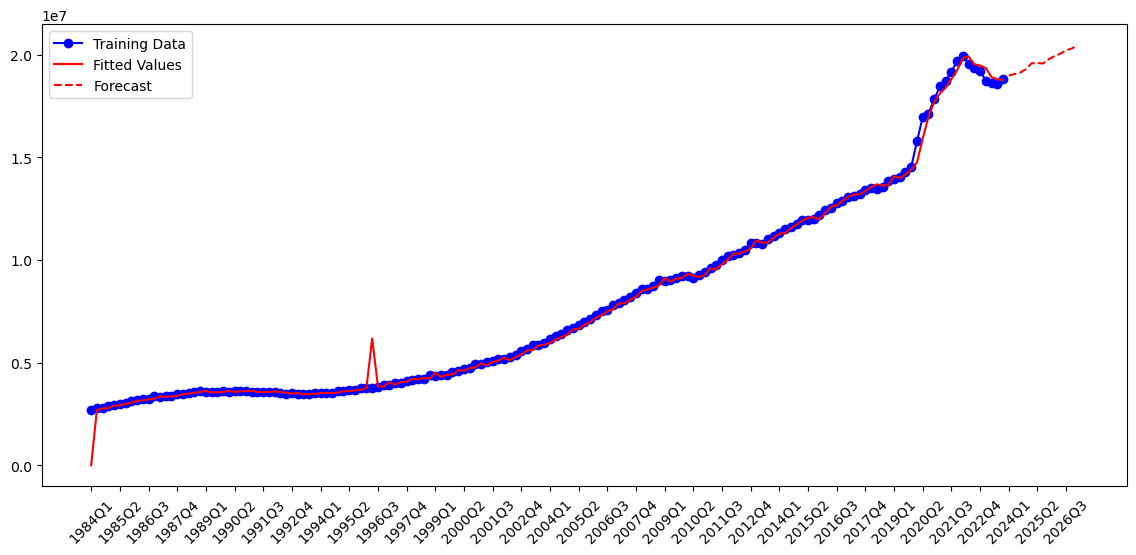

In [34]:
plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_all,
         y_all,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_all,
         sarima.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_base,
         sarima.forecast(len(date_base)),
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([df['Date'][::5], date_base[::5]])

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

## Forecast by SARIMAX model with Proper Feature Selections

Before applying the SARIMAX model, we implemented the feature selection process combining Lasso feature selection, Grid Search and the RFE process.

### **LASSO Feature Selection**:
- LASSO (Least Absolute Shrinkage and Selection Operator) is a regression technique that performs both feature selection and regularization to improve model accuracy and interpretability.
- It adds an L1 penalty to the loss function, which forces some coefficients to shrink to exactly zero, effectively removing less important features.
- How it works: 
  - The model minimizes the sum of squared errors with a penalty proportional to the absolute values of the coefficients.
  - Features with negligible contribution are eliminated.
- Key Advantage: Simultaneously selects features and prevents overfitting by penalizing large coefficients.

### **Recursive Feature Elimination (RFE)**:
- RFE is a **wrapper method** for feature selection that recursively eliminates the least important features.
- How it works:
  1. Train a model (e.g., linear regression, decision trees) on the entire dataset.
  2. Rank features based on their importance (e.g., coefficients or feature importance scores).
  3. Remove the least important feature(s).
  4. Repeat until the desired number of features is reached.
- Key Advantage: Identifies a subset of features that contributes the most to the model's performance by iteratively refining the selection.

### **Grid Search**:
- **Grid Search** is a systematic method to optimize hyperparameters for machine learning models by testing all possible combinations within a predefined parameter grid.
- How it works:
  1. Define a range of values for each hyperparameter you want to tune.
  2. Evaluate the model's performance for every combination of hyperparameter values using a cross-validation method.
  3. Select the combination that results in the best performance metric (e.g., accuracy, RMSE).


In [36]:
# You can suppress warnings by using Python's built-in warnings module. 
# Add this code to suppress warnings globally in your notebook:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming df_X and df['Deposits'] are defined

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state=42)

# Apply normalization to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the pipeline
lasso = Lasso(max_iter=10000)
rfe = RFE(estimator=lasso)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Ensure scaling is part of the pipeline
    ('feature_selection', rfe)
])

# Define the parameter grid
param_grid = {
    'feature_selection__estimator__alpha': [0.1, 1, 10, 100, 500, 1000, 5000,100000],
    'feature_selection__n_features_to_select': list(range(1, 15))  # Test n_features_to_select from 1 to 20
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best parameters
best_alpha = grid_search.best_params_['feature_selection__estimator__alpha']
best_n_features = grid_search.best_params_['feature_selection__n_features_to_select']
print(f"Best alpha: {best_alpha}")
print(f"Best n_features_to_select: {best_n_features}")

# Use the best parameters
lasso_best = Lasso(alpha=best_alpha, max_iter=5000)
selector_best = RFE(estimator=lasso_best, n_features_to_select=best_n_features)
selector_best.fit(X_train_scaled, y_train)

# Get the selected features
selected_mask = selector_best.get_support()
selected_features = np.where(selected_mask)[0]

print(f"Selected features based on optimized RFE and Lasso: {selected_features}")


Best alpha: 5000
Best n_features_to_select: 8
Selected features based on optimized RFE and Lasso: [ 0  1  4  8 11 12 13 14]


In [37]:
print(f"Selected features based on RFE with Lasso: {selected_features}")

print("Feature Ranking:", selector_best.ranking_)

# Retrieve the importance of selected features
print("Feature Coefficients:", selector_best.estimator_.coef_)
# Display column names corresponding to the indices
selected_columns_ind = X_all.columns[selected_features]
print("Selected Columns:", list(selected_columns_ind))

Selected features based on RFE with Lasso: [ 0  1  4  8 11 12 13 14]
Feature Ranking: [1 1 4 8 1 2 7 6 1 5 3 1 1 1 1]
Feature Coefficients: [-961077.22076012  928226.42854097  542296.57506332 -442196.12693934
 -731209.44463746 1138301.29152279 3817012.07172521  495202.37832951]
Selected Columns: ['Real GDP growth', 'Nominal GDP growth', 'Unemployment rate', '10-year Treasury yield', 'House Price Index (Level)', 'Commercial Real Estate Price Index (Level)', 'Real GDP', 'Real disposable income']


In [38]:
selected_indices = np.where(selected_mask)[0]
X_all_std   = scaler.fit_transform(X_all.iloc[:, selected_indices])
X_base_std  = scaler.transform(X_base.iloc[:, selected_indices])
X_adv_std   = scaler.transform(X_adv.iloc[:, selected_indices])
X_fsA_std   = scaler.transform(X_fsA.iloc[:, selected_indices])
X_fsB_std   = scaler.transform(X_fsB.iloc[:, selected_indices])

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    endog =  y_all.values,
    exog  =  X_all_std,
    order =  (0,1,0), 
    seasonal_order = (2,1,1,49)
)

sarima_exg = model.fit(disp = False)
sarima_exg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  160
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 49)   Log Likelihood               -1485.409
Date:                              Tue, 10 Dec 2024   AIC                           2994.818
Time:                                      12:01:43   BIC                           3027.224
Sample:                                           0   HQIC                          3007.962
                                              - 160                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2690.2272   1.02e+05     -0.026      0.979   -2.02e+05    1.97e+05
x2          7644.9320   1.06e+05      0.072      0.943   -2.01e+05    2.16e+05
x3          1.854e+04   4.81e+04      0.385      0.700   -7.58e+04    1.13e+05
x4         -1.478e+05   1.24e+05     -1.188      0.235   -3.92e+05     9.6e+04
x5          1.116e+06   2.79e+05      3.996      0.000    5.69e+05    1.66e+06
x6          3.959e+05   1.48e+05      2.683      0.007    1.07e+05    6.85e+05
x7         -5.686e+05   3.11e+05     -1.829      0.067   -1.18e+06    4.08e+04
x8           4.04e+04   9.08e+04      0.445      0.656   -1.37e+05    2.18e+05
ar.S.L49      -1.0480      0.224     -4.670      0.000      -1.488      -0.608
ar.S.L98      -0.1323      0.214     -0.617      0.537      -0.553       0.288
ma.S.L49       0.9986      0.181      5.527      0.000       0.644       1.353
sigma2      2.974e+10      0.003   9.57e+12      0.000    2.97e+10    2.97e+10
===================================================================================
Ljung-Box (L1) (Q):                   7.18   Jarque-Bera (JB):                93.04
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               8.52   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.76e+32. Standard errors may be unstable.
"""

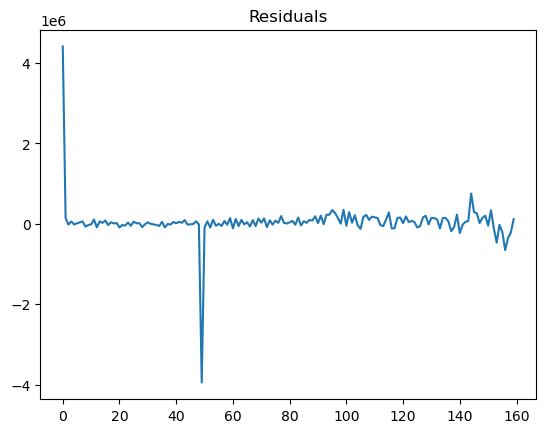

In [40]:
# Training fitting
residuals = sarima_exg.resid
plt.plot(residuals)
plt.title("Residuals")
plt.show()

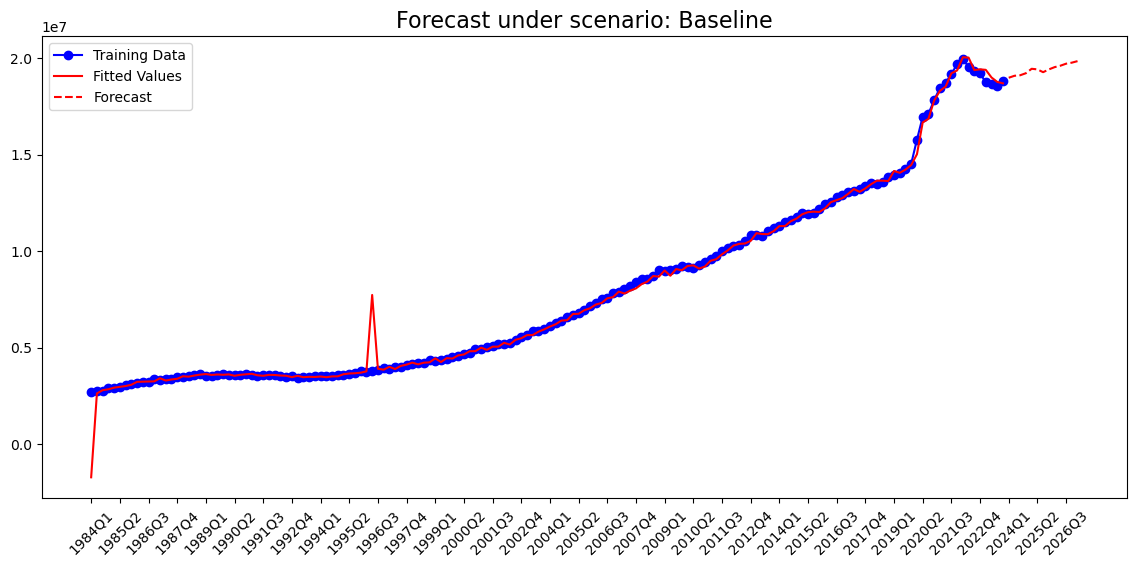

In [41]:
# Baseline
y_preds = sarima_exg.forecast(steps = len(date_base), exog = X_base_std)

plt.figure(figsize = (14,6))

# Plot training data
plt.plot(date_all,
         y_all.values,
         'b-o',
         label = 'Training Data')

# Plot fitted values for training data
plt.plot(date_all,
          sarima_exg.fittedvalues,
         'r',
         label = 'Fitted Values')

# Forecasting and plotting for test data
plt.plot( date_base,
          y_preds,
         '--r',
         label = "Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_all[::5], date_base[::5]])

# Add title
plt.title("Forecast under scenario: Baseline", fontsize=16)

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation = 45, fontsize = 10)
plt.legend()
plt.show()

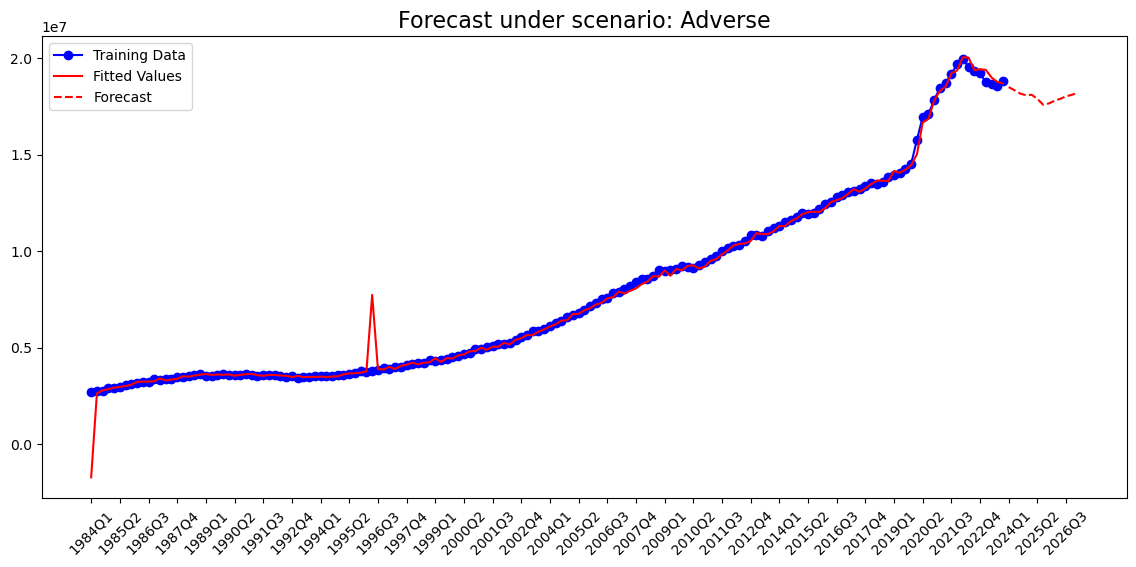

In [42]:
#ad
y_preds = sarima_exg.forecast(steps = len(date_adv), exog = X_adv_std)

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_all,
         y_all.values,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_all,
          sarima_exg.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot( date_adv,
          y_preds,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_all[::5], date_base[::5]])

# Add title
plt.title("Forecast under scenario: Adverse", fontsize=16)

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

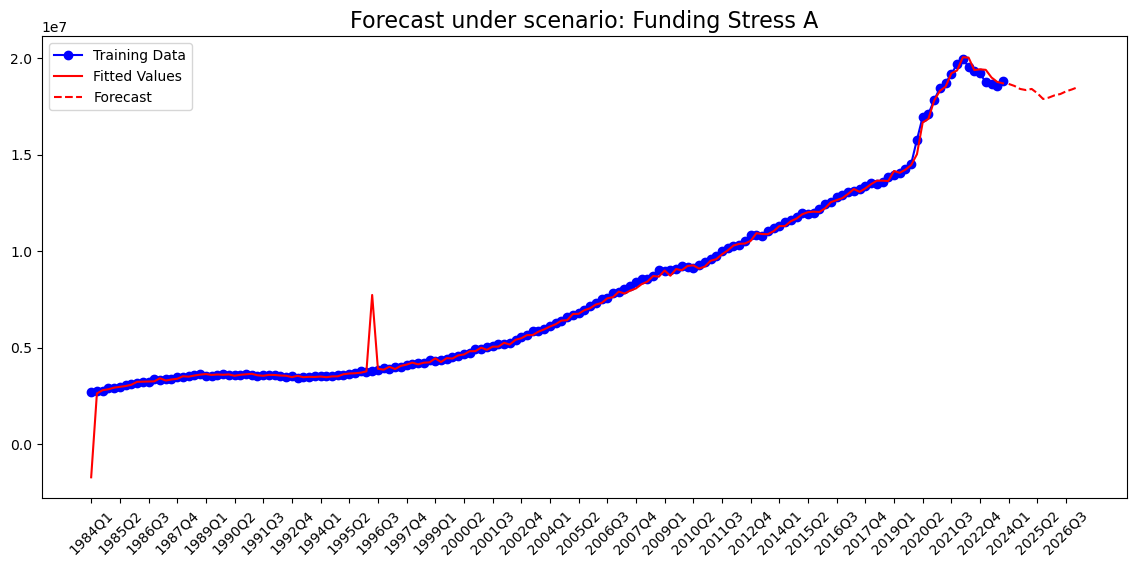

In [43]:
# A
y_preds = sarima_exg.forecast(steps = len(date_fsA), exog = X_fsA_std)

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_all,
         y_all.values,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_all,
          sarima_exg.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot( date_fsA,
          y_preds,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_all[::5], date_base[::5]])

# Add title
plt.title("Forecast under scenario: Funding Stress A", fontsize=16)

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

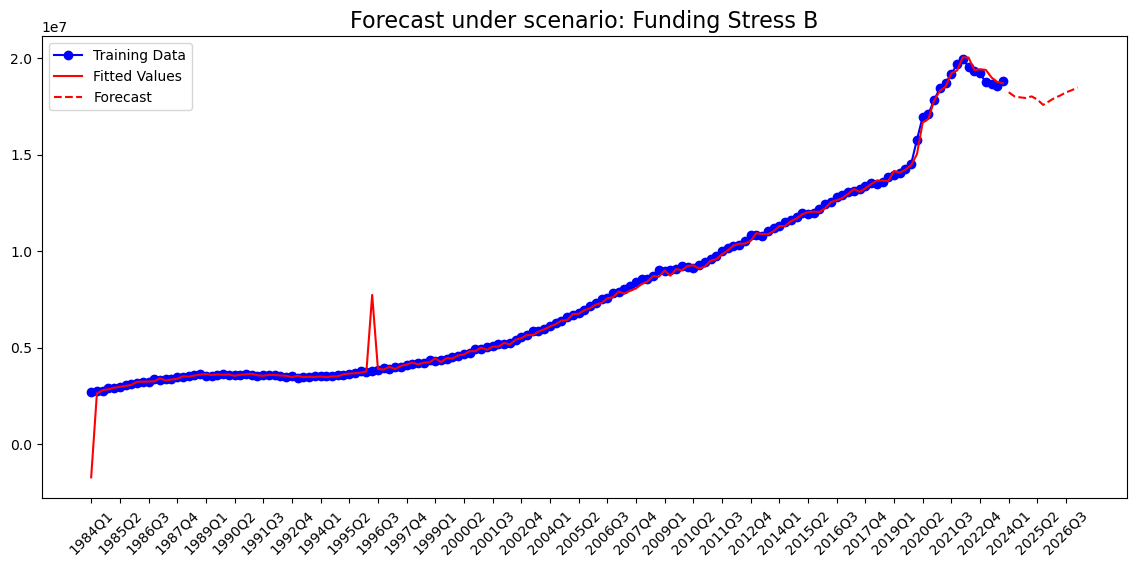

In [44]:
# B
y_preds = sarima_exg.forecast(steps = len(date_fsB), exog = X_fsB_std)

plt.figure(figsize=(14,6))

# Plot training data
plt.plot(date_all,
         y_all.values,
         'b-o',
         label='Training Data')

# Plot fitted values for training data
plt.plot(date_all,
         sarima_exg.fittedvalues,
         'r',
         label='Fitted Values')

# Forecasting and plotting for test data
plt.plot(date_fsB,
         y_preds,
         '--r',
         label="Forecast")

# Customize x-axis ticks to display every 10th label with rotation
xticks = np.concatenate([date_all[::5], date_base[::5]])

# Add title
plt.title("Forecast under scenario: Funding Stress B", fontsize=16)

# Set combined x-ticks with rotation and font size
plt.xticks(xticks, rotation=45, fontsize=10)
plt.legend()
plt.show()

# Comparison between Real Deposit Data with our forecast (until 12/09/2024)
## **Remark:** 
#### As one can see from the graphs below, our model successfully forecasts the behavior of the deposit trend before 12/09/2024.

# Exposure: What is the Bank’s exposure to profit/loss under different future scenarios?

Our model provide accurate forecast under four different scenarios. Traditionally, one may need to build models to predict **loans** and **interest rate (loan yield / deposit cost)** so that one can evaluate the profit & loss through this formula of **Net Interest Income**:

### Net Interest Income (NII):

$$\text{Net Interest Income (NII)} = \left( \text{Loans} \times \text{Loan Yield} \right) - \left( \text{Deposits} \times \text{Deposit Cost} \right)$$

Where:
- **Loans**: The total amount of interest-earning loans issued by the bank.
- **Loan Yield**: The average interest rate earned on loans.
- **Deposits**: The total amount of interest-bearing deposits held by the bank.
- **Deposit Cost**: The average interest rate paid on deposits.

Net Interest Income (NII) is a key profitability metric for banks, representing the difference between the interest income earned on loans and other interest-bearing assets, and the interest expense paid on deposits and borrowings. It is a primary driver of a bank's revenue and a critical measure of its operational efficiency and interest rate risk management.

### SNII: A simpler measure

For brievity of the model description, we choose the following simplified version:

1. Assume a fixed or dynamic **LDR** to calculate loans from deposit. **LDR** represents the ratio of loan to deposit.
2. Assume to the **interest rate (loan yield / deposit cost)** are fixed value as the rate on 12/09/2024.
3. Then one can compute the simplified version of **Simplified Net Interest Income (SNII)**:
   $$\text{SNII} = (\text{Loans} \times \text{Loan Yield}) - (\text{Deposits} \times \text{Deposit Cost})$$
4. In our model, we choose **LDR = 0.8**, **Loan yield = 5.5%**, and **Deposit cost = 2.5%**.

In [47]:
# Input: Predicted deposit vectors under four scenarios
scenarios = {
    "Baseline": sarima_exg.forecast(steps = len(date_base), exog = X_base_std),
    "Adverse": sarima_exg.forecast(steps = len(date_base), exog = X_adv_std),
    "Funding Stress A": sarima_exg.forecast(steps = len(date_base), exog = X_fsA_std),
    "Funding Stress B": sarima_exg.forecast(steps = len(date_base), exog = X_fsB_std)
}

# Parameters
loan_yield = 0.055  # Loan yield (5.5%)
deposit_cost = 0.025  # Deposit cost (2.5%)
ldr = 0.8  # Loan-to-Deposit Ratio (LDR)

# Initialize a dictionary to store NII results
nii_results = {"Date": date_base}

# Calculate NII for each scenario
for scenario_name, deposit_forecast in scenarios.items():
    # Calculate loans based on deposits and LDR
    loans = deposit_forecast * ldr
    # Calculate NII using the formula
    nii = (loans * loan_yield) - (deposit_forecast * deposit_cost)
    # Store results
    nii_results[scenario_name] = nii

# Convert NII results into a DataFrame for better readability
nii_df = pd.DataFrame(nii_results)
nii_df.reset_index(inplace=True)
profit_pred = nii_df.iloc[:,1:6]
profit_pred.to_csv("/Users/ching-lung/deposit-prediction/cleaned_data/profit.csv", index=False)
profit_pred

,Date,Baseline,Adverse,Funding Stress A,Funding Stress B
0,2024Q1,360721.839678,351519.212630,354661.243275,346446.786752
1,2024Q2,362650.964779,348453.026913,352667.474821,342424.985382
2,2024Q3,363180.708331,345177.736550,349696.555645,341409.360329
3,2024Q4,365197.350017,343502.422806,348611.473227,340777.629639
4,2025Q1,369552.375954,343963.504247,349710.954068,342377.523678
5,2025Q2,368951.896513,339964.214361,345436.503208,339280.981495
6,2025Q3,366202.094928,334169.399261,339842.364850,334006.016124
7,2025Q4,368924.628973,335425.654115,341197.410990,337450.631631
8,2026Q1,371162.220492,338103.944841,343427.258242,340834.969829
9,2026Q2,372551.487949,340009.074215,344697.236729,343287.302744


# Final Results: Profit Prediction under Four Scenarios

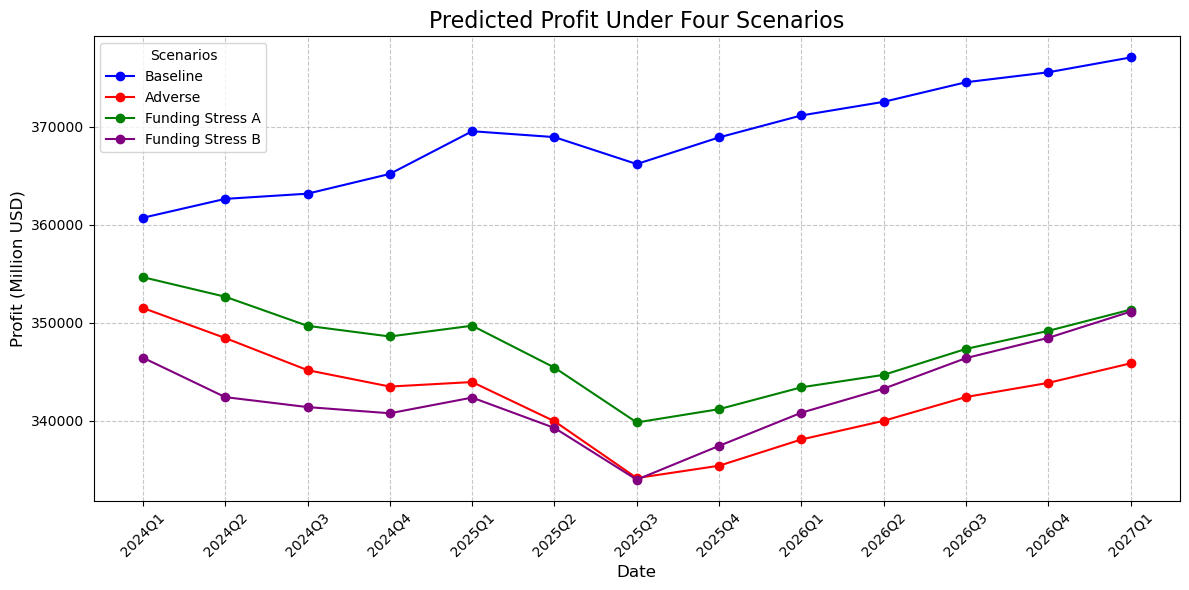

In [49]:
# Extract the date column for the x-axis
x_axis = profit_pred["Date"]

# Plot each scenario on the same figure with distinct colors
plt.figure(figsize=(12, 6))
plt.plot(x_axis, profit_pred["Baseline"], label="Baseline", marker="o", color="blue")
plt.plot(x_axis, profit_pred["Adverse"], label="Adverse", marker="o", color="red")
plt.plot(x_axis, profit_pred["Funding Stress A"], label="Funding Stress A", marker="o", color="green")
plt.plot(x_axis, profit_pred["Funding Stress B"], label="Funding Stress B", marker="o", color="purple")


# Add labels, title, legend, and grid
plt.title("Predicted Profit Under Four Scenarios", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Profit (Million USD)", fontsize=12)
plt.legend(title="Scenarios", fontsize=10)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


# Future Discussion: Enhancing the Model Framework

While the current model effectively forecasts **deposit** under four scenarios and provide reliable forcast of **SNII**, there is room for improvement by leveraging advanced machine learning methods to dynamically predict deposits, loans, and interest rates.


## Possibilities for Enhancement

1. **Incorporating Machine Learning Models**:
   - Use advanced models like LSTM, Prophet, or Gradient Boosting to predict deposits, loans, and interest rates more accurately.
   - Explore deep learning frameworks for multi-task learning to capture interdependencies across these variables.

2. **Dynamic LDR Prediction**:
   - Instead of assuming a fixed **LDR**, predict it dynamically based on macroeconomic indicators and stress test scenarios.

3. **Scenario-Based Interest Rate Forecasting**:
   - Predict **Loan Yield** and **Deposit Cost** using macroeconomic trends (e.g., Federal Funds Rate, Treasury yields).
   - Incorporate scenario-specific adjustments for greater precision.

4. **Simultaneous Predictions**:
   - Build a unified model to predict deposits, loans, and interest rates together, capturing interdependencies and non-linear relationships.


## Implications for Bank’s Exposure to Profit/Loss

1. **Granularity**: Gain a more detailed understanding of exposure by dynamically modeling all components of profit and loss.
2. **Accuracy**: Improve precision in evaluating profits/losses, especially under stress scenarios.
3. **Scenario Adaptability**: Explore complex interdependencies between macroeconomic shocks and key metrics for better tail-risk management.


## Next Steps

1. **Data Collection**: Aggregate historical data on deposits, loans, and interest rates alongside macroeconomic variables.
2. **Model Experimentation**: Test models like LSTM, XGBoost, or Random Forests for simultaneous predictions.
3. **Validation**: Backtest against historical stress tests for reliability.
4. **Implementation**: Automate scenario analysis and reporting for real-time insights.

Transitioning beyond **SNII** to a dynamic framework will enable more accurate evaluations of a bank’s exposure under diverse scenarios.


# Reference: 
1. FDIC Quarterly Banking Profile: https://www.fdic.gov/quarterly-banking-profile
2. Dodd-Frank Act Stress Tests 2024: https://www.federalreserve.gov/supervisionreg/dfa-stress-tests-2024.htm
3. FRED Deposit Data: https://fred.stlouisfed.org/series/DPSACBW027SBOG#